# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Caleb Effendi
- **Email:** calebeffendi.work@gmail.com


## Menentukan Pertanyaan Bisnis

- Apakah terdapat pengaruh cuaca atau musim dari jumlah total peminjaman sepeda?
- Apakah hari kerja berpengaruh terhadap jumlah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [ ]:
# Membaca dari Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Dataset per hari

day_df = pd.read_csv("/content/drive/MyDrive/Dicoding/Proyek Akhir/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Dataset per jam

hour_df = pd.read_csv("/content/drive/MyDrive/Dicoding/Proyek Akhir/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**Pengecekan untuk missing value atau data duplikat**

In [ ]:
# Dataset per hari

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
# Dataset per jam

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Karena kolom dteday bertipe sebuah *object* bukan *datetime* maka kita harus mengubah kolom pada dataset tersebut menjadi tipe *datetime*.

In [ ]:
# Mengubah tipe data object menjadi datetime

# Dataset per hari
for column1 in ["dteday"]:
  day_df[column1] = pd.to_datetime(day_df[column1])

# Dataset per jam
for column2 in ["dteday"]:
  hour_df[column2] = pd.to_datetime(hour_df[column2])

Melakukan pengecekan kembali apakah tipe data sudah berubah sesuai dengan yang diinginkan.

In [ ]:
# Dataset per hari

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
# Dataset per jam

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Dari hasil *output* di atas didapatkan bahwa kolom dteday sudah berubah menjadi tipe data *datetime*.

**Melakukan Identifikasi Data**

Pada proses ini dilakukan pengecekan apabila terdapat masalah pada dataset yang kita miliki seperti *missing value*, *unstandard value*, nilai yang tidak akurat, dan lain-lain.

In [ ]:
# Mengecek apakah ada data duplikat
print("Jumlah duplikasi untuk dataset day: ", day_df.duplicated().sum())
print("Jumlah duplikasi untuk dataset hour: ", hour_df.duplicated().sum())

print("\n")

# Mengecek apakah ada data yang NaN atau Null
print("Jumlah data null untuk dataset day:")
print(day_df.isna().sum())
print("\n")
print("Jumlah data null untuk dataset hour:")
print(hour_df.isna().sum())

Jumlah duplikasi untuk dataset day:  0
Jumlah duplikasi untuk dataset hour:  0


Jumlah data null untuk dataset day:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Jumlah data null untuk dataset hour:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


### Cleaning Data

**Penjelasan**

Karena dari hasil proses penilaian data atau *assessing data* tidak ada data yang bermasalah, maka proses penilaian data sudah selesai dan lanjut ke tahap berikutnya.

## Exploratory Data Analysis (EDA)

**Mengeksplorasi Parameter Statistik dari Data**

In [ ]:
# Dataset per hari

day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
# Dataset per jam

hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Melakukan perubahan isi data pada kolom agar mudah dibaca dan membuat *pivot table*:

*   Cuaca



In [ ]:
# Membuat duplikat dataset
day_df_new = day_df.copy()
hour_df_new = hour_df.copy()

# Melakukan pendefinisian dictionary untuk tiap keys (int) dan values (cuaca)
weather_change = {1: 'Clear, Few clouds, Partly cloudy, Partly cloudy', 2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', 3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds', 4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'}

# Mengubah nilai int pada kolom "weathersit" menjadi string berupa cuaca
day_df_new['weathersit'] = day_df_new['weathersit'].map(weather_change)
hour_df_new['weathersit'] = hour_df_new['weathersit'].map(weather_change)

In [ ]:
# Mengelompokkan data berdasarkan cuaca (per hari)
day_df_new.groupby(by="weathersit")['cnt'].sum().sort_values(ascending=False)

weathersit
Clear, Few clouds, Partly cloudy, Partly cloudy                                            2257952
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                                996858
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds      37869
Name: cnt, dtype: int64

In [ ]:
# Mengelompokkan data berdasarkan cuaca (per jam)
hour_df_new.groupby(by="weathersit")['cnt'].sum().sort_values(ascending=False)

weathersit
Clear, Few clouds, Partly cloudy, Partly cloudy                                            2338173
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                                795952
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds     158331
Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog                                     223
Name: cnt, dtype: int64

*   Musim

In [ ]:
# Melakukan pendefinisian dictionary untuk tiap keys (int) dan values (musim)
season_change = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}

# Mengubah nilai int pada kolom "season" menjadi string berupa musim
day_df_new['season'] = day_df_new['season'].map(season_change)
hour_df_new['season'] = hour_df_new['season'].map(season_change)

In [ ]:
# Mengelompokkan data berdasarkan musim (per hari)
day_df_new.groupby(by="season")['cnt'].sum().sort_values(ascending=False)

season
fall      1061129
summer     918589
winter     841613
spring     471348
Name: cnt, dtype: int64

In [ ]:
# Mengelompokkan data berdasarkan musim (per jam)
hour_df_new.groupby(by="season")['cnt'].sum().sort_values(ascending=False)

season
fall      1061129
summer     918589
winter     841613
spring     471348
Name: cnt, dtype: int64

In [ ]:
# Menggabungkan kedua data csv day.csv dan hour.csv menjadi satu data dan menghilangkan data duplikat
bike_combined_df = pd.concat([day_df_new, hour_df_new], ignore_index=True).drop_duplicates(subset=['dteday'])

# Membuat pivot tabel dari dataset yang sudah digabung
pivot_bike_combined = bike_combined_df.groupby(by="season")['cnt'].sum().sort_values(ascending=False)
print(pivot_bike_combined)

season
fall      1061129
summer     918589
winter     841613
spring     471348
Name: cnt, dtype: int64


*   Hari kerja

In [ ]:
# Melakukan pendefinisian dictionary untuk tiap keys (int) dan values (jenis hari)
workingday_change = {0: 'hari libur', 1: 'hari kerja'}

# Mengubah nilai int pada kolom "workingday" menjadi string berupa jenis hari
day_df_new['workingday'] = day_df_new['workingday'].map(workingday_change)
hour_df_new['workingday'] = hour_df_new['workingday'].map(workingday_change)

In [ ]:
# Mengelompokkan data berdasarkan hari kerja atau hari libur (per hari)
day_df_new.groupby(by="workingday")['cnt'].sum().sort_values(ascending=False)

workingday
hari kerja    2292410
hari libur    1000269
Name: cnt, dtype: int64

In [ ]:
# Mengelompokkan data berdasarkan hari kerja atau hari libur (per jam)
hour_df_new.groupby(by="workingday")['cnt'].sum().sort_values(ascending=False)

workingday
hari kerja    2292410
hari libur    1000269
Name: cnt, dtype: int64

In [ ]:
# Menghitung total jumlah pengguna untuk tiap kategori hari kerja (tidak termasuk weekend dan tanggal merah) dan hari libur

# Menggabungkan kedua data csv day.csv dan hour.csv menjadi satu data dan menghilangkan data duplikat
bike_combined_df = pd.concat([day_df_new, hour_df_new], ignore_index=True).drop_duplicates(subset=['dteday'])

# Membuat pivot tabel dari dataset yang sudah digabung
pivot_bike_combined = bike_combined_df.groupby(by="workingday")['cnt'].sum().sort_values(ascending=False)
print(pivot_bike_combined)

workingday
hari kerja    2292410
hari libur    1000269
Name: cnt, dtype: int64


In [ ]:
# Menghitung total jumlah hari kerja (tidak termasuk weekend dan tanggal merah) dan hari libur

# Menggabungkan kedua data csv day.csv dan hour.csv menjadi satu data dan menghilangkan data duplikat
bike_combined_df = pd.concat([day_df_new, hour_df_new], ignore_index=True).drop_duplicates(subset=['dteday'])

# Membuat pivot tabel dari dataset yang sudah digabung
print("Jumlah masing-masing hari kerja dan hari libur:")
pivot_bike_combined = bike_combined_df.groupby(by="workingday").instant.nunique().sort_values(ascending=False)
print(pivot_bike_combined)

Jumlah masing-masing hari kerja dan hari libur:
workingday
hari kerja    500
hari libur    231
Name: instant, dtype: int64


In [ ]:
# Menghitung rata-rata pengguna untuk tiap hari kerja (tidak termasuk weekend dan tanggal merah) dan hari libur

# Menggabungkan kedua data csv day.csv dan hour.csv menjadi satu data dan menghilangkan data duplikat
bike_combined_df = pd.concat([day_df_new, hour_df_new], ignore_index=True).drop_duplicates(subset=['dteday'])

# Membuat pivot tabel dari dataset yang sudah digabung
print("Jumlah pengguna rata-rata untuk hari kerja dan hari libur:")
pivot_bike_combined = bike_combined_df.groupby(by="workingday")['cnt'].mean().round()
print(pivot_bike_combined)

Jumlah pengguna rata-rata untuk hari kerja dan hari libur:
workingday
hari kerja    4585.0
hari libur    4330.0
Name: cnt, dtype: float64


Dilakukan perhitungan rata-rata karena jumlah hari kerja akan lebih banyak dari hari libur, sehingga untuk melihat persebaran pengguna secara merata harus dihitung rata-ratanya per kategori hari (hari kerja atau hari libur) dan membulatkan angkanya ke bilangan bulat karena menunjukan jumlah orang.

In [ ]:
# Persentase perbedaan jumlah pengguna antara hari kerja dan hari libur
print("Persentase perbedaan pengguna:", abs((4330-4585)/4585)*100,"%")

Persentase perbedaan pengguna: 5.561613958560523 %


*   Hari (Senin-Minggu)

Karena diketahui pada tanggal 11 Januari 2011 memiliki nilai *weekday* sama dengan nilai *integer* 6, yang di mana tanggal 11 Januari 2011 merupakan hari Sabtu, sehingga dapat dibuatkan perubahan data sebagai berikut.

In [ ]:
# Melakukan pendefinisian dictionary untuk tiap keys (int) dan values (hari)
weekday_change = {0: 'minggu', 1: 'senin', 2: 'selasa', 3: 'rabu', 4: 'kamis', 5: 'jumat', 6:'sabtu'}

# Mengubah nilai int pada kolom "weekday" menjadi string berupa hari
day_df_new['weekday'] = day_df_new['weekday'].map(weekday_change)
hour_df_new['weekday'] = hour_df_new['weekday'].map(weekday_change)

In [ ]:
# Mengelompokkan data berdasarkan hari (day.csv)
day_df_new.groupby(by="weekday")['cnt'].sum().sort_values(ascending=False)

weekday
jumat     487790
kamis     485395
sabtu     477807
rabu      473048
selasa    469109
senin     455503
minggu    444027
Name: cnt, dtype: int64

In [ ]:
# Mengelompokkan data berdasarkan hari (hour.csv)
hour_df_new.groupby(by="weekday")['cnt'].sum().sort_values(ascending=False)

weekday
jumat     487790
kamis     485395
sabtu     477807
rabu      473048
selasa    469109
senin     455503
minggu    444027
Name: cnt, dtype: int64

In [ ]:
# Menggabungkan kedua data csv day.csv dan hour.csv menjadi satu data dan menghilangkan data duplikat
bike_combined_df = pd.concat([day_df_new, hour_df_new], ignore_index=True).drop_duplicates(subset=['dteday'])

# Membuat pivot tabel dari dataset yang sudah digabung
pivot_bike_combined = bike_combined_df.groupby(by="weekday")['cnt'].sum().sort_values(ascending=False)
print(pivot_bike_combined)

weekday
jumat     487790
kamis     485395
sabtu     477807
rabu      473048
selasa    469109
senin     455503
minggu    444027
Name: cnt, dtype: int64


**Penjelasn**

Dari hasil proses EDA di atas dapat ditarik beberapa kesimpulan seperti:


* Kondisi cuaca tipe 1: "*Clear, Few clouds, Partly cloudy, Partly cloudy*" memiliki pengguna paling banyak dan kondisi cuaca tipe 4:  "*Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog*" memiliki jumlah pengguna paling sedikit.
*   Musim juga sangat berpengaruh terhadap banyaknya pengguna *bike sharing system*. Menurut survey yang diadakan di Amerika Serikat, sebesar 41% orang dewasa lebih menyukai musim gugur (*fall*) dan diikuti oleh 24% masing- masing musim panas (*summer*) dan musim semi (*spring*), sedangkan musim dingin (*winter*) merupakan musim yang paling jarang disukai  [1]. Hal ini cukup sesuai dengan data peminjaman sepeda untuk tiap musimnya.
*   Hari kerja juga menjadi alasan utama untuk orang-orang melakukan peminjaman atau rental sepeda sesuai dengan data. Didapatkan perbedaan jumlah pengguna kira-kira ≈ 5.6% lebih banyak pada hari kerja dibandingkan hari libur, hal ini didukung juga jika kita mengurutkan jumlah pengguna untuk tiap harinya dan didapatkan bahwa hari jumat memiliki jumlah pengguna terbanyak, sedangkan hari minggu memiliki jumlah pengguna paling sedikit.

\
**Sumber:**\
[1] https://pro.morningconsult.com/instant-intel/fall-seasons-ranking



## Visualization & Explanatory Analysis

**Visualisasi Data**



*   Grafik jumlah pengguna peminjaman tiap bulannya untuk tahun 2011 dan 2012



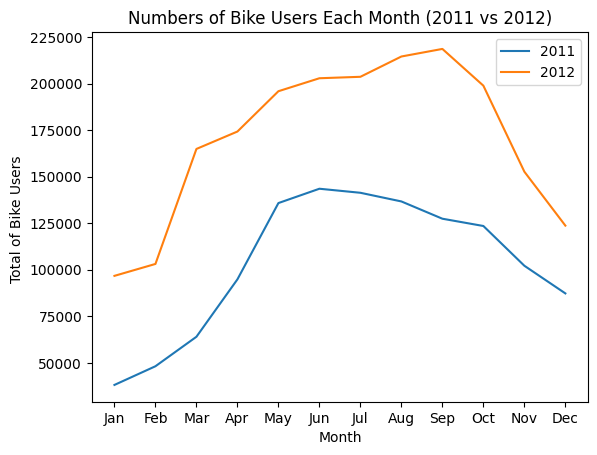

In [ ]:
# Membuat duplikat dataset
day_df_vis = day_df.copy()
hour_df_vis = hour_df.copy()

# Melakukan mapping kolom 'yr' menggunakan dictionary
yr_change = {0: '2011', 1: '2012'}
day_df_vis['yr'] = day_df_vis['yr'].map(yr_change)
hour_df_vis['yr'] = hour_df_vis['yr'].map(yr_change)

# Mengkonversi bulan dalam integer ke dalam bentuk bulan
mnth_change = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
day_df_vis['mnth'] = day_df_vis['mnth'].map(mnth_change)
hour_df_vis['mnth'] = hour_df_vis['mnth'].map(mnth_change)

# Melakukan sorting dengan bulan
months_in_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_df_vis['mnth'] = pd.Categorical(day_df_vis['mnth'], categories=months_in_order, ordered=True)
day_df_vis.sort_values(by ="mnth", inplace=True)
hour_df_vis['mnth'] = pd.Categorical(hour_df_vis['mnth'], categories=months_in_order, ordered=True)
hour_df_vis.sort_values(by ="mnth", inplace=True)

# Menggabungkan kedua data csv day.csv dan hour.csv menjadi satu data dan menghilangkan data duplikat
bike_combined_df = pd.concat([day_df_vis, hour_df_vis], ignore_index=True).drop_duplicates(subset=['dteday'])

# Mendefinisikan dataset untuk tiap tahunnya
bike_2011 = bike_combined_df[bike_combined_df['yr'] == "2011"]  # 2011
bike_2012 = bike_combined_df[bike_combined_df['yr'] == "2012"]  # 2012

# Mengelompokkan data berdasarkan jumlah pengguna tiap bulannya untuk tahun 2011 dan 2012
months_2011 = bike_2011.groupby('mnth')['cnt'].sum()
months_2012 = bike_2012.groupby('mnth')['cnt'].sum()


# # Script untuk debugging (mengecek jumlah data)
# print("Jumlah pengguna perbulan tahun 2011:")
# print(months_2011)
# print("\nJumlah pengguna perbulan tahun 2012:")
# print(months_2012)

# Plot data
plt.plot(months_2011.index, months_2011.values, label='2011')
plt.plot(months_2012.index, months_2012.values, label='2012')


# Menambahkan label dan judul
plt.xlabel('Month')
plt.ylabel('Total of Bike Users ')
plt.title('Numbers of Bike Users Each Month (2011 vs 2012)')

# Menambahkan legenda
plt.legend()

# Menampilkan plot data
plt.show()

Dapat dilihat dari grafik bahwa terdapat peningkatan jumlah pengguna dari tahun 2011 dan 2012. Kemudian jika kita lihat grafiknya, jumlah pengguna terbanyak terdapat pada bulan-bulan pada musim gugur dan musim panas. Hal ini bersesuaian dengan apa yang didapatkan sebelumnya.

*   Persebaran data jumlah pengguna berdasarkan musim

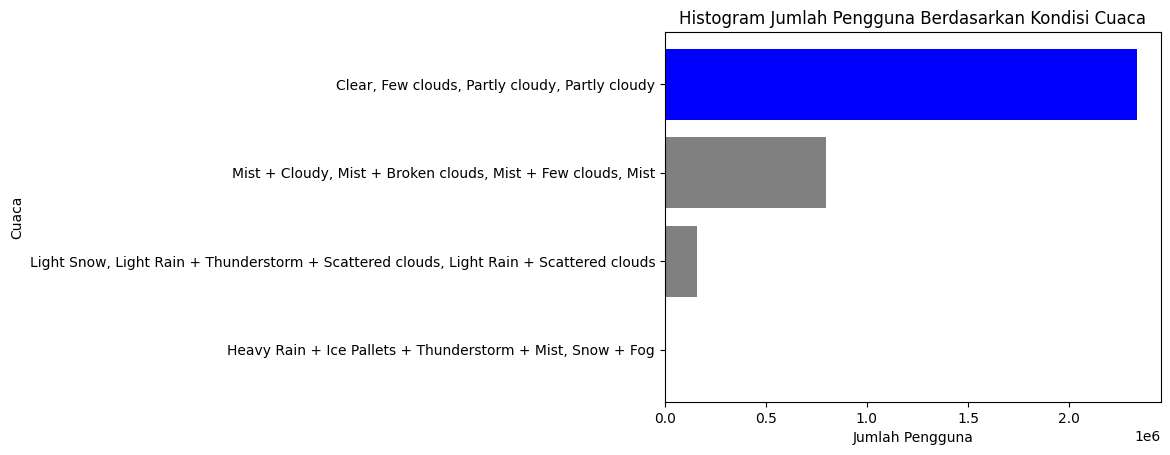

In [ ]:
# Mengelompokan data berdasarkan kondisi cuaca dan menghitung total jumlah pengguna untuk tiap kondisi cuaca
grouped_df = hour_df_new.groupby('weathersit')['cnt'].sum().reset_index()

# Mengurutkan data berdasarkan jumlah pengguna
grouped_df.sort_values(by='cnt', inplace=True)

# Plot histogram
plt.barh(y=grouped_df["weathersit"], width=grouped_df["cnt"], color='gray')
max_index = grouped_df["cnt"].idxmax()
plt.barh(y=grouped_df.loc[max_index, "weathersit"], width=grouped_df.loc[max_index, "cnt"], color='blue')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Cuaca')
plt.title('Histogram Jumlah Pengguna Berdasarkan Kondisi Cuaca')
plt.show()

*   Persebaran data jumlah pengguna berdasarkan musim

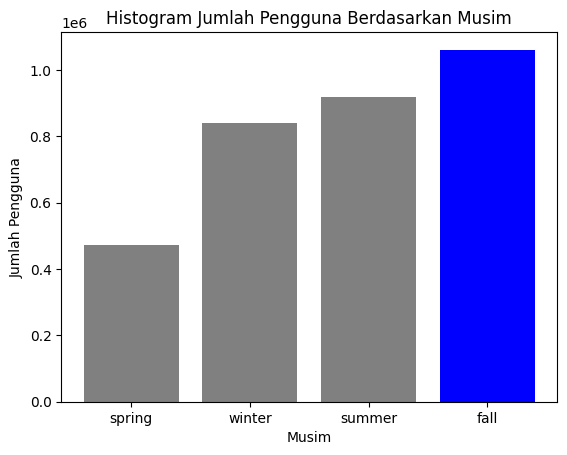

In [ ]:
# Mengelompokan data berdasarkan musim dan menghitung total jumlah pengguna untuk tiap musim
grouped_df = bike_combined_df.groupby('season')['cnt'].sum().reset_index()

# Mengurutkan data berdasarkan jumlah pengguna
grouped_df.sort_values(by='cnt', inplace=True)

# Plot histogram
plt.bar(x=grouped_df["season"], height=grouped_df["cnt"], color='gray')
max_index = grouped_df["cnt"].idxmax()
plt.bar(x=grouped_df.loc[max_index, "season"], height=grouped_df.loc[max_index, "cnt"], color='blue')
plt.xlabel('Musim')
plt.ylabel('Jumlah Pengguna')
plt.title('Histogram Jumlah Pengguna Berdasarkan Musim')
plt.show()

*   Persebaran data jumlah pengguna berdasarkan hari kerja atau hari libur

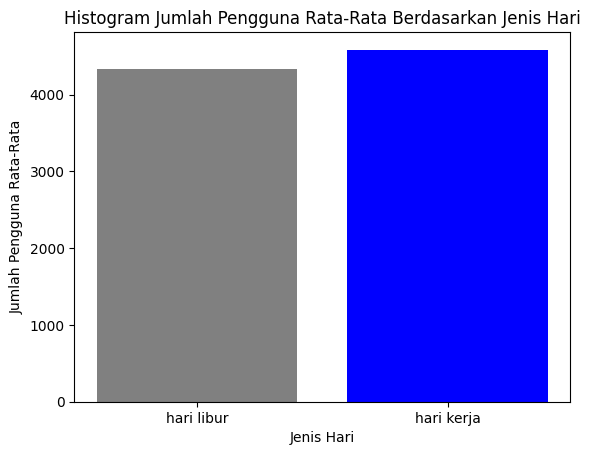

In [ ]:
# Mengelompokan data berdasarkan jenis hari dan menghitung total jumlah pengguna untuk tiap jenis hari
grouped_df = bike_combined_df.groupby('workingday')['cnt'].mean().round().reset_index()

# Mengurutkan data berdasarkan jumlah pengguna
grouped_df.sort_values(by='cnt', inplace=True)

# Plot histogram
plt.bar(x=grouped_df["workingday"], height=grouped_df["cnt"], color='gray')
max_index = grouped_df["cnt"].idxmax()
plt.bar(x=grouped_df.loc[max_index, "workingday"], height=grouped_df.loc[max_index, "cnt"], color='blue')
plt.xlabel('Jenis Hari')
plt.ylabel('Jumlah Pengguna Rata-Rata')
plt.title('Histogram Jumlah Pengguna Rata-Rata Berdasarkan Jenis Hari')
plt.show()

*   Persebaran data jumlah pengguna berdasarkan hari

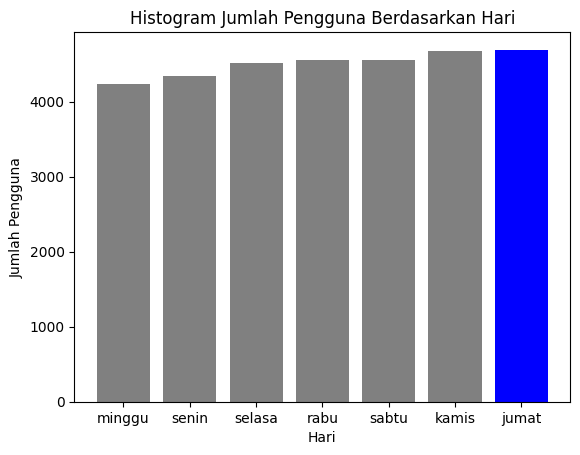

In [ ]:
# Mengelompokan data berdasarkan jenis hari dan menghitung total jumlah pengguna tiap harinya
grouped_df = bike_combined_df.groupby('weekday')['cnt'].mean().round().reset_index()

# Mengurutkan data berdasarkan jumlah pengguna
grouped_df.sort_values(by='cnt', inplace=True)

# Plot histogram
plt.bar(x=grouped_df["weekday"], height=grouped_df["cnt"], color='gray')
max_index = grouped_df["cnt"].idxmax()
plt.bar(x=grouped_df.loc[max_index, "weekday"], height=grouped_df.loc[max_index, "cnt"], color='blue')
plt.xlabel('Hari')
plt.ylabel('Jumlah Pengguna')
plt.title('Histogram Jumlah Pengguna Berdasarkan Hari')
plt.show()

*   Persentase pengguna teregistrasi dan pengguna kasual

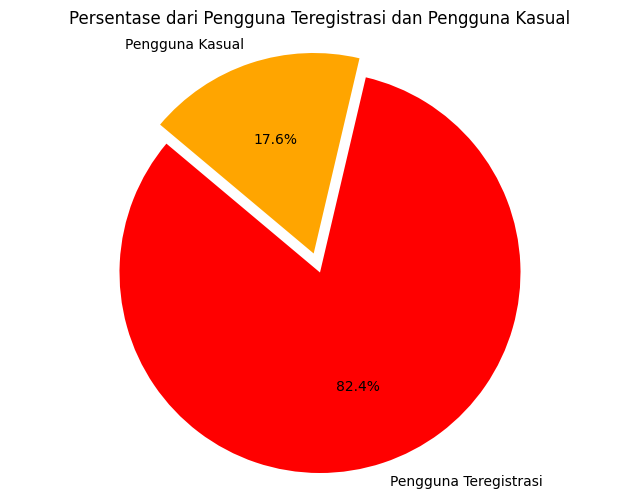

In [ ]:
# Menghitung persentase dari pengguna kasual terhadap pengguna total
bike_combined_df['registered_percentage'] = (bike_combined_df['registered'] / bike_combined_df['cnt']) * 100

# Menghitung persentase dari pengguna teregistrasi terhadap pengguna total
bike_combined_df['casual_percentage'] = (bike_combined_df['casual'] / bike_combined_df['cnt']) * 100

# Membuat pie plot
plt.figure(figsize=(8, 6))
explode = (0.1, 0)
plt.pie([bike_combined_df['registered_percentage'].sum(), bike_combined_df['casual_percentage'].sum()], labels=['Pengguna Teregistrasi', 'Pengguna Kasual'], autopct='%1.1f%%', startangle=140, colors=['red', 'orange'], explode=explode)

# Judul
plt.title('Persentase dari Pengguna Teregistrasi dan Pengguna Kasual')

# Plot pie
plt.axis('equal')
plt.show()

***Explanatory Analysis***

Dari hasil proses EDA dan visualisasi data di atas dapat ditarik beberapa kesimpulan seperti:


*   Cuaca sangat mempengaruhi banyaknya pengguna *bike sharing system*. Seperti pada cuaca yang tergolong cerah akan semakin banyak penggunanya, sedangkan pada cuaca ekstrem seperti hujan dan salju akan semakin sedikit penggunanya.
*   Musim juga sangat berpengaruh terhadap banyaknya pengguna *bike sharing system*. Menurut survey yang diadakan di Amerika Serikat, sebesar 41% orang dewasa lebih menyukai musim gugur (*fall*) dan diikuti oleh 24% masing- masing musim panas (*summer*) dan musim semi (*spring*), sedangkan musim dingin (*winter*) merupakan musim yang paling jarang disukai  [1]. Hal ini cukup sesuai dengan data peminjaman sepeda untuk tiap musimnya.
*   Hari kerja juga menjadi alasan utama untuk orang-orang melakukan peminjaman atau rental sepeda sesuai dengan data. Didapatkan perbedaan jumlah pengguna kira-kira ≈ 5.6% lebih banyak pada hari kerja dibandingkan hari libur, hal ini didukung juga jika kita mengurutkan jumlah pengguna untuk tiap harinya dan didapatkan bahwa hari jumat memiliki jumlah pengguna terbanyak, sedangkan hari minggu memiliki jumlah pengguna paling sedikit.

\

Berdasarkan analisa RFM (*Recency*, *Frequency*, *Monetary*) dapat disimpulkan bahwa parameter *Monetary* memiliki nilai yang paling tinggi yang ditunjukkan dengan besarnya total jumlah pengguna, hal ini menunjukkan bahwa jasa *bike sharing* ini menghasilkan *revenue* yang sangat besar. parameter *Recency* memiliki nilai yang paling kecil, hal ini berarti pengguna menyukai jasa yang ditawarkan yang ditunjukkan dengan adanya pengguna yang cukup banyak tiap harinya dan menunjukkan bahwa banyaknya pengguna setia yang akan terus menggunakan jasa tersebut.

\


**Sumber:**\
[1] https://pro.morningconsult.com/instant-intel/fall-seasons-ranking

### Pertanyaan 1:

*   Cuaca sangat mempengaruhi banyaknya pengguna *bike sharing system*. Seperti pada cuaca yang tergolong cerah akan semakin banyak penggunanya, sedangkan pada cuaca ekstrem seperti hujan dan salju akan semakin sedikit penggunanya.
*   Musim juga sangat berpengaruh terhadap banyaknya pengguna *bike sharing system*. Menurut survey yang diadakan di Amerika Serikat, sebesar 41% orang dewasa lebih menyukai musim gugur (*fall*) dan diikuti oleh 24% masing- masing musim panas (*summer*) dan musim semi (*spring*), sedangkan musim dingin (*winter*) merupakan musim yang paling jarang disukai  [1]. Hal ini cukup sesuai dengan data peminjaman sepeda untuk tiap musimnya.

### Pertanyaan 2:

  Hari kerja juga menjadi alasan utama untuk orang-orang melakukan peminjaman atau rental sepeda sesuai dengan data. Didapatkan perbedaan jumlah pengguna kira-kira ≈ 5.6% lebih banyak pada hari kerja dibandingkan hari libur, hal ini didukung juga jika kita mengurutkan jumlah pengguna untuk tiap harinya dan didapatkan bahwa hari jumat memiliki jumlah pengguna terbanyak, sedangkan hari minggu memiliki jumlah pengguna paling sedikit.

## Conclusion

- Cuaca dan musim berpengaruh pada jumlah total pengguna *bike sharing*
- Hari kerja berpengaruh pada jumlah total pengguna *bike sharing* walaupun tidak terlalu signifikan